In [ ]:
#install pySpark
!pip install pySpark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pySpark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=9b61cb835061796c3cfffb3a52b77f4758f49a34b0604ae467706e5cc5f9c486
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pySpark


In [ ]:
#import libraries and load dataset
from pyspark.sql import SparkSession
spark= SparkSession.builder.appName("test_pyspark").getOrCreate()

In [ ]:
df= spark.read.csv("/content/sample_data/california_housing_train.csv",header=True,inferSchema= True)

In [ ]:
df

DataFrame[longitude: double, latitude: double, housing_median_age: double, total_rooms: double, total_bedrooms: double, population: double, households: double, median_income: double, median_house_value: double]

In [ ]:
df_train= spark.read.csv("/content/seeds_dataset.csv",header=True,inferSchema= True)

In [ ]:
df_train.show()

+-----+---------+-----------+-----------------+---------------+---------------------+-----------------------+----------+
| Area|Perimeter|Compactness|Length_of_ kernel|Width_of_kernel|Asymmetry_coefficient|Length_of_kernel_groove|Wheat_Type|
+-----+---------+-----------+-----------------+---------------+---------------------+-----------------------+----------+
|15.26|    14.84|      0.871|            5.763|          3.312|                2.221|                   5.22|         1|
|14.88|    14.57|     0.8811|            5.554|          3.333|                1.018|                  4.956|         1|
|14.29|    14.09|      0.905|            5.291|          3.337|                2.699|                  4.825|         1|
|13.84|    13.94|     0.8955|            5.324|          3.379|                2.259|                  4.805|         1|
|16.14|    14.99|     0.9034|            5.658|          3.562|                1.355|                  5.175|         1|
|14.38|    14.21|     0.8951|   

In [ ]:
#Checking attributes with their data type
df_train.printSchema()

root
 |-- Area: double (nullable = true)
 |-- Perimeter: double (nullable = true)
 |-- Compactness: double (nullable = true)
 |-- Length_of_ kernel: double (nullable = true)
 |-- Width_of_kernel: double (nullable = true)
 |-- Asymmetry_coefficient: double (nullable = true)
 |-- Length_of_kernel_groove: double (nullable = true)
 |-- Wheat_Type: integer (nullable = true)



In [ ]:
#assembling the columns
from pyspark.ml.feature import VectorAssembler
featureassembler= VectorAssembler(inputCols=['Area', 'Perimeter', 'Compactness', 'Length_of_ kernel', 'Asymmetry_coefficient', 'Length_of_kernel_groove'], outputCol='Independant Features')

In [ ]:
output=featureassembler.transform(df_train)

In [ ]:
output.show()

+-----+---------+-----------+-----------------+---------------+---------------------+-----------------------+----------+--------------------+
| Area|Perimeter|Compactness|Length_of_ kernel|Width_of_kernel|Asymmetry_coefficient|Length_of_kernel_groove|Wheat_Type|Independant Features|
+-----+---------+-----------+-----------------+---------------+---------------------+-----------------------+----------+--------------------+
|15.26|    14.84|      0.871|            5.763|          3.312|                2.221|                   5.22|         1|[15.26,14.84,0.87...|
|14.88|    14.57|     0.8811|            5.554|          3.333|                1.018|                  4.956|         1|[14.88,14.57,0.88...|
|14.29|    14.09|      0.905|            5.291|          3.337|                2.699|                  4.825|         1|[14.29,14.09,0.90...|
|13.84|    13.94|     0.8955|            5.324|          3.379|                2.259|                  4.805|         1|[13.84,13.94,0.89...|
|16.14

In [ ]:
output.columns

['Area',
 'Perimeter',
 'Compactness',
 'Length_of_ kernel',
 'Width_of_kernel',
 'Asymmetry_coefficient',
 'Length_of_kernel_groove',
 'Wheat_Type',
 'Independant Features']

Create the final output with the dataset target variable

In [ ]:
#The select() is a transformation function that is used to select the columns from the dataset
fin_output=output.select("Independant Features", "Wheat_Type")

In [ ]:
fin_output.show()

+--------------------+----------+
|Independant Features|Wheat_Type|
+--------------------+----------+
|[15.26,14.84,0.87...|         1|
|[14.88,14.57,0.88...|         1|
|[14.29,14.09,0.90...|         1|
|[13.84,13.94,0.89...|         1|
|[16.14,14.99,0.90...|         1|
|[14.38,14.21,0.89...|         1|
|[14.69,14.49,0.87...|         1|
|[14.11,14.1,0.891...|         1|
|[16.63,15.46,0.87...|         1|
|[16.44,15.25,0.88...|         1|
|[15.26,14.85,0.86...|         1|
|[14.03,14.16,0.87...|         1|
|[13.89,14.02,0.88...|         1|
|[13.78,14.06,0.87...|         1|
|[13.74,14.05,0.87...|         1|
|[14.59,14.28,0.89...|         1|
|[13.99,13.83,0.91...|         1|
|[15.69,14.75,0.90...|         1|
|[14.7,14.21,0.915...|         1|
|[12.72,13.57,0.86...|         1|
+--------------------+----------+
only showing top 20 rows



Scaling the data(to deal with the cluster of dimensionality)

In [ ]:
from pyspark.ml.feature import StandardScaler
scaler=StandardScaler(inputCol="Independant Features",
                      outputCol="ScaledFeatures",
                      withStd=True,
                      withMean=False)

In [ ]:
scalerModel=scaler.fit(fin_output)
fin_output=scalerModel.transform(fin_output)
fin_output.select("ScaledFeatures").show()

+--------------------+
|      ScaledFeatures|
+--------------------+
|[5.24452795332028...|
|[5.11393027165175...|
|[4.91116018695588...|
|[4.75650503761158...|
|[5.54696468981581...|
|[4.94209121682475...|
|[5.04863143081749...|
|[4.84929812721816...|
|[5.71536696354628...|
|[5.65006812271202...|
|[5.24452795332028...|
|[4.82180387844584...|
|[4.77368894309428...|
|[4.73588435103234...|
|[4.72213722664617...|
|[5.01426361985209...|
|[4.80805675405968...|
|[5.39230954047151...|
|[5.05206821191403...|
|[4.37158555479908...|
+--------------------+
only showing top 20 rows



Import model

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
#measures how close each point in one cluster is to points in the neighboring cluster
silhouette_score=[]
evaluator=ClusteringEvaluator(predictionCol="prediction",
                              featuresCol="ScaledFeatures",
                              metricName="silhouette",
                              distanceMeasure="squaredEuclidean")

In [ ]:
for i in range(2,10):
  kmeans=KMeans(featuresCol="ScaledFeatures",k=i)
  model=kmeans.fit(fin_output)
  predictions=model.transform(fin_output)
  score=evaluator.evaluate(predictions)
  silhouette_score.append(score)
  print('Silhouette_score for K = ',i,'is',score)

Silhouette_score for K =  2 is 0.6334512290425433
Silhouette_score for K =  3 is 0.7151665267717033
Silhouette_score for K =  4 is 0.6340013750348948
Silhouette_score for K =  5 is 0.5414392518765837
Silhouette_score for K =  6 is 0.554741996587174
Silhouette_score for K =  7 is 0.4959451849401021
Silhouette_score for K =  8 is 0.47091898164442
Silhouette_score for K =  9 is 0.44597165935339994


Text(0.5, 1.0, 'silhouette_score')

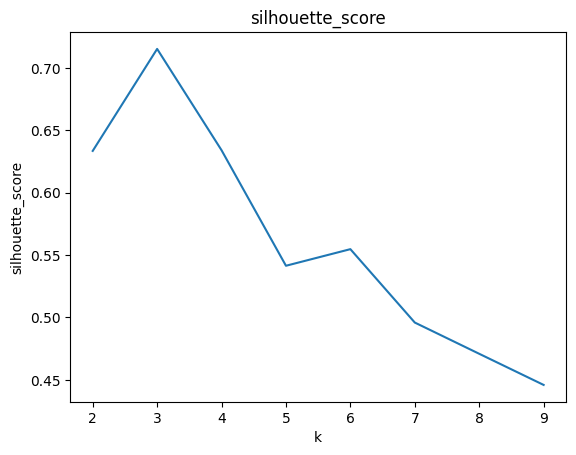

In [ ]:
#visualiosing silhouette score
import matplotlib.pyplot as plt

plt.plot(range(2,10), silhouette_score)
plt.xlabel("k")
plt.ylabel("silhouette_score")
plt.title("silhouette_score")

In [ ]:
Kmeans=KMeans(featuresCol='ScaledFeatures',k=3)
model=Kmeans.fit(fin_output)
predictions=model.transform(fin_output)

In [ ]:
centers=model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
  print(center)


Cluster Centers: 
[ 6.27012845 12.3273835   8.88649917 11.17089525  2.36434178 11.78919687]
[ 4.45964352 10.49956612  8.69533449  9.71291398  2.51318833  9.983839  ]
[ 5.54009113 11.48581475 22.84185614  1.63574639  3.78925051  6.84578539]


In [ ]:
predictions.select('Wheat_Type','prediction').show()

+----------+----------+
|Wheat_Type|prediction|
+----------+----------+
|         1|         1|
|         1|         1|
|         1|         1|
|         1|         1|
|         1|         1|
|         1|         1|
|         1|         1|
|         1|         1|
|         1|         0|
|         1|         0|
|         1|         1|
|         1|         1|
|         1|         1|
|         1|         1|
|         1|         1|
|         1|         1|
|         1|         1|
|         1|         1|
|         1|         1|
|         1|         1|
+----------+----------+
only showing top 20 rows



In [ ]:
#Converting to Pandas Dataframe
predictions_pd=predictions.toPandas()

In [ ]:
#visualizing the resultsa